# Tumorsphere Culture's Time Evolution

## Metadata Analysis
Let's try to understand how many images we have and about what exactly.


In [ ]:
#@title Mounting the Shared Drive Unit
from google.colab import drive
drive.mount('/content/drive')

!ls drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas\ Incucyte\ 2025/

Mounted at /content/drive
'Descripcion_exp_esferas_Incucyte (1).docx'   Esferas_2025
 Descripcion_exp_esferas_Incucyte.docx	      incucyte_images_metadata.parquet
 df_cells_A1_00d00h00m.parquet


In [ ]:
#@title Number of files
import os
import glob

# Set the path to your image folder
folder_path = '/content/drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025/'
image_paths = glob.glob(os.path.join(folder_path, '*.jpg'))

# print(f'Total images found: {len(image_paths)}')

# THE PREVIOUS TIMES OUT (DRIVE TIMEOUT)
!find "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025" -name '*.jpg' | wc -l
# Ans: 122563

122563


Ok, we're dealing with 122563 jpg images of 529KB each, so 64GB of images.

In [ ]:
#@title Do all files start with `VID1849`?
!find "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025" -name 'VID1849_*.jpg' | wc -l
# Ans: 122563 (so yes)

122563


All files start with `VID1849`.

In [ ]:
#@title Finding the Unique Section Numbers
!find "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025" -name 'VID1849_A1_*_00d00h00m.jpg' | sed -E 's/.*_A1_([0-9]+)_00d00h00m\.jpg/\1/' | sort -n | uniq | wc -l


121


In [ ]:
!find "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025" -name 'VID1849_A1_*_00d00h00m.jpg' | sed -E 's/.*_A1_([0-9]+)_00d00h00m\.jpg/\1/' | sort -n | uniq


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121


Amazing, there are 121 images per well per time, indexed from 1 to 121. I just checked that for `A1`, but let's now revise the rest.

In [ ]:
import subprocess

def count_sections(well_id):
    cmd = f"""find "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025" -name 'VID1849_{well_id}_*_00d00h00m.jpg' | sed -E 's/.*_{well_id}_([0-9]+)_00d00h00m\\.jpg/\\1/' | sort -n | uniq | wc -l"""
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    return int(result.stdout.strip())

wells = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3']

for well in wells:
    count = count_sections(well)
    print(f"Well {well}: {count} unique sections")


Well A1: 121 unique sections
Well A2: 121 unique sections
Well A3: 121 unique sections
Well B1: 121 unique sections
Well B2: 120 unique sections
Well B3: 121 unique sections


`B2` parece tener una sección menos.

In [ ]:
import subprocess

cmd = """find "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025" -name 'VID1849_B2_*_00d00h00m.jpg' | sed -E 's/.*_B2_([0-9]+)_00d00h00m\\.jpg/\\1/' | sort -n | uniq"""
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)

# Convert to set of ints
sections_found = set(map(int, result.stdout.strip().splitlines()))

expected_sections = set(range(1, 122))
missing_sections = expected_sections - sections_found

print("Missing section(s) for B2:", sorted(missing_sections))


Missing section(s) for B2: [58]


Let's check if every section gets to 7 days.

In [ ]:
import subprocess

def count_sections(well_id):
    cmd = f"""find "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025" -name 'VID1849_{well_id}_*_07d00h00m.jpg' | sed -E 's/.*_{well_id}_([0-9]+)_07d00h00m\\.jpg/\\1/' | sort -n | uniq | wc -l"""
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    return int(result.stdout.strip())

wells = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3']

for well in wells:
    count = count_sections(well)
    print(f"Well {well}: {count} unique sections")

Well A1: 121 unique sections
Well A2: 121 unique sections
Well A3: 121 unique sections
Well B1: 120 unique sections
Well B2: 121 unique sections
Well B3: 121 unique sections


In [ ]:
import subprocess

cmd = """find "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025" -name 'VID1849_B1_*_07d00h00m.jpg' | sed -E 's/.*_B1_([0-9]+)_07d00h00m\\.jpg/\\1/' | sort -n | uniq"""
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)

# Convert to set of ints
sections_found = set(map(int, result.stdout.strip().splitlines()))

expected_sections = set(range(1, 122))
missing_sections = expected_sections - sections_found

print("Missing section(s) for B1 at day 7:", sorted(missing_sections))

Missing section(s) for B1 at day 7: [58]


This is quite something, section 58 is again the one missing (in B2 at the beginning and at B1 in the end).

In [ ]:
#@title Missing sections for each time in well A1
import subprocess
import re
from collections import defaultdict
from datetime import timedelta

# Settings
well = "B1"
base_path = "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025"
expected_sections = set(range(1, 122))  # 1 to 121

# Compile regex for performance
pattern = re.compile(rf'VID1849_{well}_(\d+)_([0-9]{{2}}d[0-9]{{2}}h00m)\.jpg$')

# Get all filenames for this well
cmd = f'find "{base_path}" -name "VID1849_{well}_*.jpg"'
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
files = result.stdout.strip().splitlines()

# Group by timestamp
sections_by_time = defaultdict(set)

for filepath in files:
    filename = filepath.split('/')[-1]
    match = pattern.match(filename)
    if match:
        section = int(match.group(1))
        timestamp = match.group(2)
        sections_by_time[timestamp].add(section)

# Check all timestamps (expected every hour for 7 days)
for hour in range(168):
    # Build expected timestamp
    delta = timedelta(hours=hour)
    d = delta.days
    h = delta.seconds // 3600
    timestamp = f"{d:02d}d{h:02d}h00m"

    found_sections = sections_by_time.get(timestamp, set())
    missing = expected_sections - found_sections
    if missing:
        print(f"{timestamp}: Missing section(s): {sorted(missing)}")



02d08h00m: Missing section(s): [58]
02d09h00m: Missing section(s): [58]
02d10h00m: Missing section(s): [58]
02d11h00m: Missing section(s): [58]
02d12h00m: Missing section(s): [58]
02d13h00m: Missing section(s): [58]
02d14h00m: Missing section(s): [58]
02d15h00m: Missing section(s): [58]
02d16h00m: Missing section(s): [58]
02d17h00m: Missing section(s): [58]
02d18h00m: Missing section(s): [58]
02d19h00m: Missing section(s): [58]
02d20h00m: Missing section(s): [58]
02d21h00m: Missing section(s): [58]
02d22h00m: Missing section(s): [58]
02d23h00m: Missing section(s): [58]
03d00h00m: Missing section(s): [58]
03d01h00m: Missing section(s): [58]
03d02h00m: Missing section(s): [58]
03d03h00m: Missing section(s): [58]
03d04h00m: Missing section(s): [58]
03d05h00m: Missing section(s): [58]
03d06h00m: Missing section(s): [58]
03d07h00m: Missing section(s): [58]
03d08h00m: Missing section(s): [58]
03d09h00m: Missing section(s): [58]
03d10h00m: Missing section(s): [58]
03d11h00m: Missing section(s

Una banda, veamos el número de secciones a `06d23h00m`.

In [ ]:
import subprocess
import re
from collections import defaultdict

# Configuration
well = "B3"
base_path = "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025"
expected_sections = set(range(1, 122))  # Section numbers from 1 to 121

# Regex to extract section number and timestamp from filename
pattern = re.compile(rf'VID1849_{well}_(\d+)_([0-9]{{2}}d[0-9]{{2}}h00m)\.jpg$')

# Use shell to find all A1 images
cmd = f'find "{base_path}" -name "VID1849_{well}_*.jpg"'
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
files = result.stdout.strip().splitlines()

# Map from timestamp to observed section numbers
sections_by_time = defaultdict(set)

for filepath in files:
    filename = filepath.split('/')[-1]
    match = pattern.match(filename)
    if match:
        section = int(match.group(1))
        timestamp = match.group(2)
        sections_by_time[timestamp].add(section)

# Iterate through expected timestamps: 7×24 + 1 = 169 hours (07d00h00m inclusive)
for day in range(8):             # 0 to 7
    for hour in range(24):       # 0 to 23
        if day == 7 and hour > 0:
            break  # Only include 07d00h00m
        timestamp = f"{day:02d}d{hour:02d}h00m"
        found_sections = sections_by_time.get(timestamp, set())
        missing = expected_sections - found_sections
        if missing:
            print(f"{timestamp}: Missing section(s): {sorted(missing)}")


In [ ]:
#@title File Metadata Frame
import polars as pl
import re
import subprocess

# Step 1: Find all image files
cmd = f'find "drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025" -name "VID1849_*.jpg"'
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
files = result.stdout.strip().splitlines()

# Step 2: Parse metadata
pattern = re.compile(r'VID1849_([AB])(\d+)_(\d+)_([0-9]{2}d[0-9]{2}h00m)\.jpg$')

records = []
for path in files:
    filename = path.split('/')[-1]
    match = pattern.match(filename)
    if match:
        line_code, gf_code, section, timestamp = match.groups()
        line = 'MCF7' if line_code == 'A' else 'MDA-MB-231'
        gf_conc = {'1': 5, '2': 10, '3': 20}[gf_code]
        day = int(timestamp[:2])
        hour = int(timestamp[3:5])
        records.append((filename, line_code + gf_code, line, int(gf_code), int(section), timestamp, day, hour, path))

# Step 3: Load into Polars
df = pl.DataFrame(
    records,
    schema=[
        "filename", "well", "line", "gf_conc", "section",
        "timestamp", "day", "hour", "path"
    ],
    orient="row"
)

# Ensuring dtypes
df = df.with_columns([
    pl.col("line").cast(pl.Categorical),
    pl.col("gf_conc").cast(pl.Utf8).cast(pl.Categorical),
    pl.col("well").cast(pl.Utf8).cast(pl.Categorical),
    pl.col("day").cast(pl.Int8),
    pl.col("hour").cast(pl.Int8),
    pl.col("section").cast(pl.Int8),
])

df.head()


filename,well,line,gf_conc,section,timestamp,day,hour,path
str,cat,cat,cat,i8,str,i8,i8,str
"""VID1849_A1_121_00d14h00m.jpg""","""A1""","""MCF7""","""1""",121,"""00d14h00m""",0,14,"""drive/Shareddrives/Tumoresfera…"
"""VID1849_A1_121_00d15h00m.jpg""","""A1""","""MCF7""","""1""",121,"""00d15h00m""",0,15,"""drive/Shareddrives/Tumoresfera…"
"""VID1849_A1_121_00d16h00m.jpg""","""A1""","""MCF7""","""1""",121,"""00d16h00m""",0,16,"""drive/Shareddrives/Tumoresfera…"
"""VID1849_A1_121_00d17h00m.jpg""","""A1""","""MCF7""","""1""",121,"""00d17h00m""",0,17,"""drive/Shareddrives/Tumoresfera…"
"""VID1849_A1_121_00d18h00m.jpg""","""A1""","""MCF7""","""1""",121,"""00d18h00m""",0,18,"""drive/Shareddrives/Tumoresfera…"


In [ ]:
# Missing sections in B1
df.filter(pl.col("well") == "B1").group_by("timestamp").agg(
    pl.count("section").alias("observed_sections")
).filter(pl.col("observed_sections") < 121).sort("timestamp")



timestamp,observed_sections
str,u32
"""02d08h00m""",120
"""02d09h00m""",120
"""02d10h00m""",120
"""02d11h00m""",120
"""02d12h00m""",120
…,…
"""06d20h00m""",120
"""06d21h00m""",120
"""06d22h00m""",120


In [ ]:
#@title Saving Metadata Frame to `parquet` in Shared Unit
df.write_parquet("incucyte_images_metadata.parquet")
!ls
# !cp ./incucyte_images_metadata.parquet drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas\ Incucyte\ 2025/

drive  incucyte_images_metadata.parquet  sample_data


In [ ]:
#@title Loading as a `pandas.DataFrame`
import pandas as pd

df_pd = pd.read_parquet("drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/incucyte_images_metadata.parquet")
df_pd.dtypes


,0
filename,object
well,category
line,category
gf_conc,category
section,int16
timestamp,object
day,int32
hour,int32
path,object


In [ ]:
df_pd.head()

,filename,well,line,gf_conc,section,timestamp,day,hour,path
0,VID1849_A1_121_00d14h00m.jpg,A1,MCF7,1,121,00d14h00m,0,14,drive/Shareddrives/Tumoresferas/Experimentos/T...
1,VID1849_A1_121_00d15h00m.jpg,A1,MCF7,1,121,00d15h00m,0,15,drive/Shareddrives/Tumoresferas/Experimentos/T...
2,VID1849_A1_121_00d16h00m.jpg,A1,MCF7,1,121,00d16h00m,0,16,drive/Shareddrives/Tumoresferas/Experimentos/T...
3,VID1849_A1_121_00d17h00m.jpg,A1,MCF7,1,121,00d17h00m,0,17,drive/Shareddrives/Tumoresferas/Experimentos/T...
4,VID1849_A1_121_00d18h00m.jpg,A1,MCF7,1,121,00d18h00m,0,18,drive/Shareddrives/Tumoresferas/Experimentos/T...


In [ ]:
pandas_memory_usage_in_mb = df_pd.memory_usage(deep=True).sum() / 1024**2
polars_memory_usage_in_mb = df.estimated_size('mb')

print("pandas:", pandas_memory_usage_in_mb, "MB")
print("polars:", polars_memory_usage_in_mb, "MB")

print("polars is", pandas_memory_usage_in_mb / polars_memory_usage_in_mb, "times smaller than pandas")


pandas: 38.83214569091797 MB
polars: 19.895651817321777 MB
polars is 1.9517905745168644 times smaller than pandas


Datatypes are well preserved when loading as a pandas dataframe, but it weights almost twice as much.

In [ ]:
#@title Loading as a `polars.DataFrame`
import polars as pl

df = pl.read_parquet("drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/incucyte_images_metadata.parquet")
df.head()

filename,well,line,gf_conc,section,timestamp,day,hour,path
str,cat,cat,cat,i8,str,i8,i8,str
"""VID1849_A1_121_00d14h00m.jpg""","""A1""","""MCF7""","""1""",121,"""00d14h00m""",0,14,"""drive/Shareddrives/Tumoresfera…"
"""VID1849_A1_121_00d15h00m.jpg""","""A1""","""MCF7""","""1""",121,"""00d15h00m""",0,15,"""drive/Shareddrives/Tumoresfera…"
"""VID1849_A1_121_00d16h00m.jpg""","""A1""","""MCF7""","""1""",121,"""00d16h00m""",0,16,"""drive/Shareddrives/Tumoresfera…"
"""VID1849_A1_121_00d17h00m.jpg""","""A1""","""MCF7""","""1""",121,"""00d17h00m""",0,17,"""drive/Shareddrives/Tumoresfera…"
"""VID1849_A1_121_00d18h00m.jpg""","""A1""","""MCF7""","""1""",121,"""00d18h00m""",0,18,"""drive/Shareddrives/Tumoresfera…"


Note: using `i8` instead of the usual `i32` only saved me 1MB.

In [ ]:
df.glimpse()

Rows: 122563
Columns: 9
$ filename  <str> 'VID1849_A1_121_00d14h00m.jpg', 'VID1849_A1_121_00d15h00m.jpg', 'VID1849_A1_121_00d16h00m.jpg', 'VID1849_A1_121_00d17h00m.jpg', 'VID1849_A1_121_00d18h00m.jpg', 'VID1849_A1_121_00d19h00m.jpg', 'VID1849_A1_121_00d20h00m.jpg', 'VID1849_A1_121_00d21h00m.jpg', 'VID1849_A1_121_00d23h00m.jpg', 'VID1849_A1_121_00d22h00m.jpg'
$ well      <cat> A1, A1, A1, A1, A1, A1, A1, A1, A1, A1
$ line      <cat> MCF7, MCF7, MCF7, MCF7, MCF7, MCF7, MCF7, MCF7, MCF7, MCF7
$ gf_conc   <cat> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
$ section    <i8> 121, 121, 121, 121, 121, 121, 121, 121, 121, 121
$ timestamp <str> '00d14h00m', '00d15h00m', '00d16h00m', '00d17h00m', '00d18h00m', '00d19h00m', '00d20h00m', '00d21h00m', '00d23h00m', '00d22h00m'
$ day        <i8> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
$ hour       <i8> 14, 15, 16, 17, 18, 19, 20, 21, 23, 22
$ path      <str> 'drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/Esferas_2025/VID1849_A1_121_00d14h00m.jpg', 'driv

## Image Processing
We'll begin by doing the segmentation of all sections of a well at a given time.

In [ ]:
#@title Requirements
! pip install scikit-image
! pip install cellpose --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

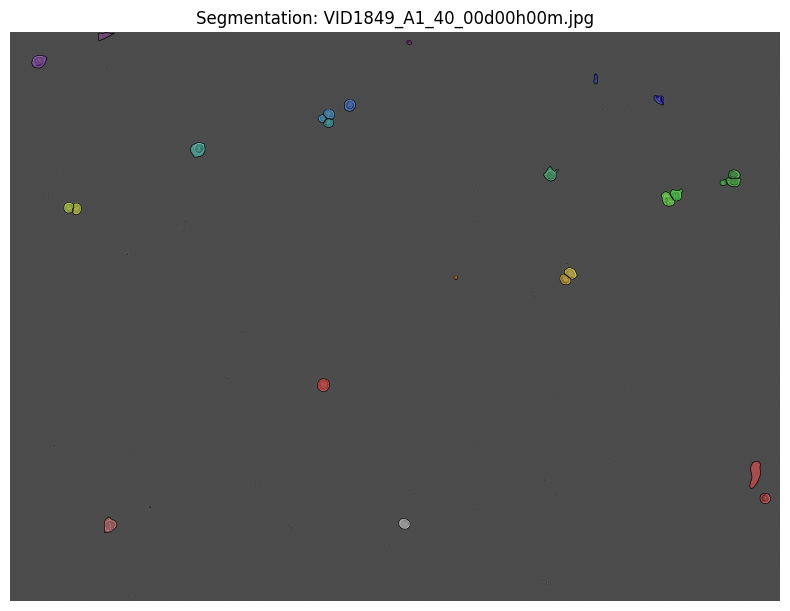

,filename,section,cell_id,centroid_x,centroid_y,area,eccentricity,circularity,mean_intensity,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax
0,VID1849_A1_40_00d00h00m.jpg,40,0,171.441509,6.052830,265.0,0.905770,0.537679,127.316981,161,191,0,16
1,VID1849_A1_40_00d00h00m.jpg,40,1,729.469697,18.318182,66.0,0.621814,1.111712,107.984848,725,735,15,23
2,VID1849_A1_40_00d00h00m.jpg,40,2,52.594286,53.000000,525.0,0.628329,0.912865,128.420952,39,68,42,66
3,VID1849_A1_40_00d00h00m.jpg,40,3,1070.688000,85.312000,125.0,0.920820,0.764999,115.360000,1067,1075,76,95
4,VID1849_A1_40_00d00h00m.jpg,40,4,1187.053846,122.842308,260.0,0.752113,0.865081,105.942308,1177,1196,115,134
5,VID1849_A1_40_00d00h00m.jpg,40,5,620.791667,133.296875,384.0,0.332910,0.993332,126.213542,611,632,123,145
6,VID1849_A1_40_00d00h00m.jpg,40,6,583.305994,148.905363,317.0,0.613986,0.911380,130.962145,572,594,140,160
7,VID1849_A1_40_00d00h00m.jpg,40,7,570.082353,157.376471,170.0,0.211796,0.962460,128.205882,563,579,150,166
8,VID1849_A1_40_00d00h00m.jpg,40,8,582.424000,165.820000,250.0,0.504671,0.971365,121.700000,573,592,158,175
9,VID1849_A1_40_00d00h00m.jpg,40,9,343.140033,214.181219,607.0,0.430374,0.897614,128.787479,329,357,201,229


In [ ]:
#@title Example Segmentation
import polars as pl
import pandas as pd
import numpy as np
import random
import shutil
from pathlib import Path
import skimage.io
import skimage.measure
from cellpose import models, utils, plot
import matplotlib.pyplot as plt
from matplotlib import cm

random.seed(42)  # or any other fixed integer


# Step 1: Load metadata (corrected path)
meta = pl.read_parquet("/content/drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/incucyte_images_metadata.parquet")

# Step 2: Filter for well A1 and timestamp 00d00h00m
subset = meta.filter(
    (pl.col("well") == "A1") &
    (pl.col("timestamp") == "00d00h00m")
)

# --- Step 3: EITHER Select a random image (section) ---
# row = random.choice(list(subset.iter_rows(named=True)))
# original_path = row["path"]
# filename = Path(original_path).name
# temp_path = f"/tmp/{filename}"

# OR manually specify an image (section)
# Manually specify the filename
target_filename = "VID1849_A1_1_00d00h00m.jpg"

# Filter the Polars dataframe to get the corresponding row
row = subset.filter(pl.col("filename") == target_filename).to_dicts()[0]

# Define source and temporary paths
original_path = row["path"]
filename = Path(original_path).name
temp_path = f"/tmp/{filename}"

# -----------------------------------------------------

# Step 4: Copy to local temp dir
shutil.copy(original_path, temp_path)

# Step 5: Load image
img = skimage.io.imread(temp_path)

# Step 6: Segment with Cellpose
model = models.CellposeModel(gpu=True)
masks, _, _ = model.eval(img, diameter=None)

# Step 7: Extract cell properties
props = skimage.measure.regionprops(masks, intensity_image=img)
records = []
for i, prop in enumerate(props):
    records.append({
        'filename': filename,
        'section': row["section"],
        'cell_id': i,
        'centroid_x': prop.centroid[1],
        'centroid_y': prop.centroid[0],
        'area': prop.area,
        'eccentricity': prop.eccentricity,
        'circularity': 4 * np.pi * prop.area / (prop.perimeter**2 + 1e-5),
        'mean_intensity': prop.mean_intensity,
        'bbox_xmin': prop.bbox[1],
        'bbox_xmax': prop.bbox[3],
        'bbox_ymin': prop.bbox[0],
        'bbox_ymax': prop.bbox[2],
    })

df_temp = pd.DataFrame(records)


# Step 8: Show segmentation overlay
# Compute outlines
outlines = utils.outlines_list(masks)

# Plot image + transparent segmentation overlay + outlines
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img, cmap='gray')
ax.imshow(masks, cmap=cm.nipy_spectral, alpha=0.4)

# Add outlines as black curves
for outline in outlines:
    ax.plot(outline[:, 0], outline[:, 1], color='black', linewidth=0.5)

ax.set_title(f"Segmentation: {filename}")
ax.axis('off')
plt.tight_layout()
plt.show()

# Step 9: Display temporary dataframe
import IPython.display as display
display.display(df_temp)

# Step 10: Clean up temp file
Path(temp_path).unlink(missing_ok=True)



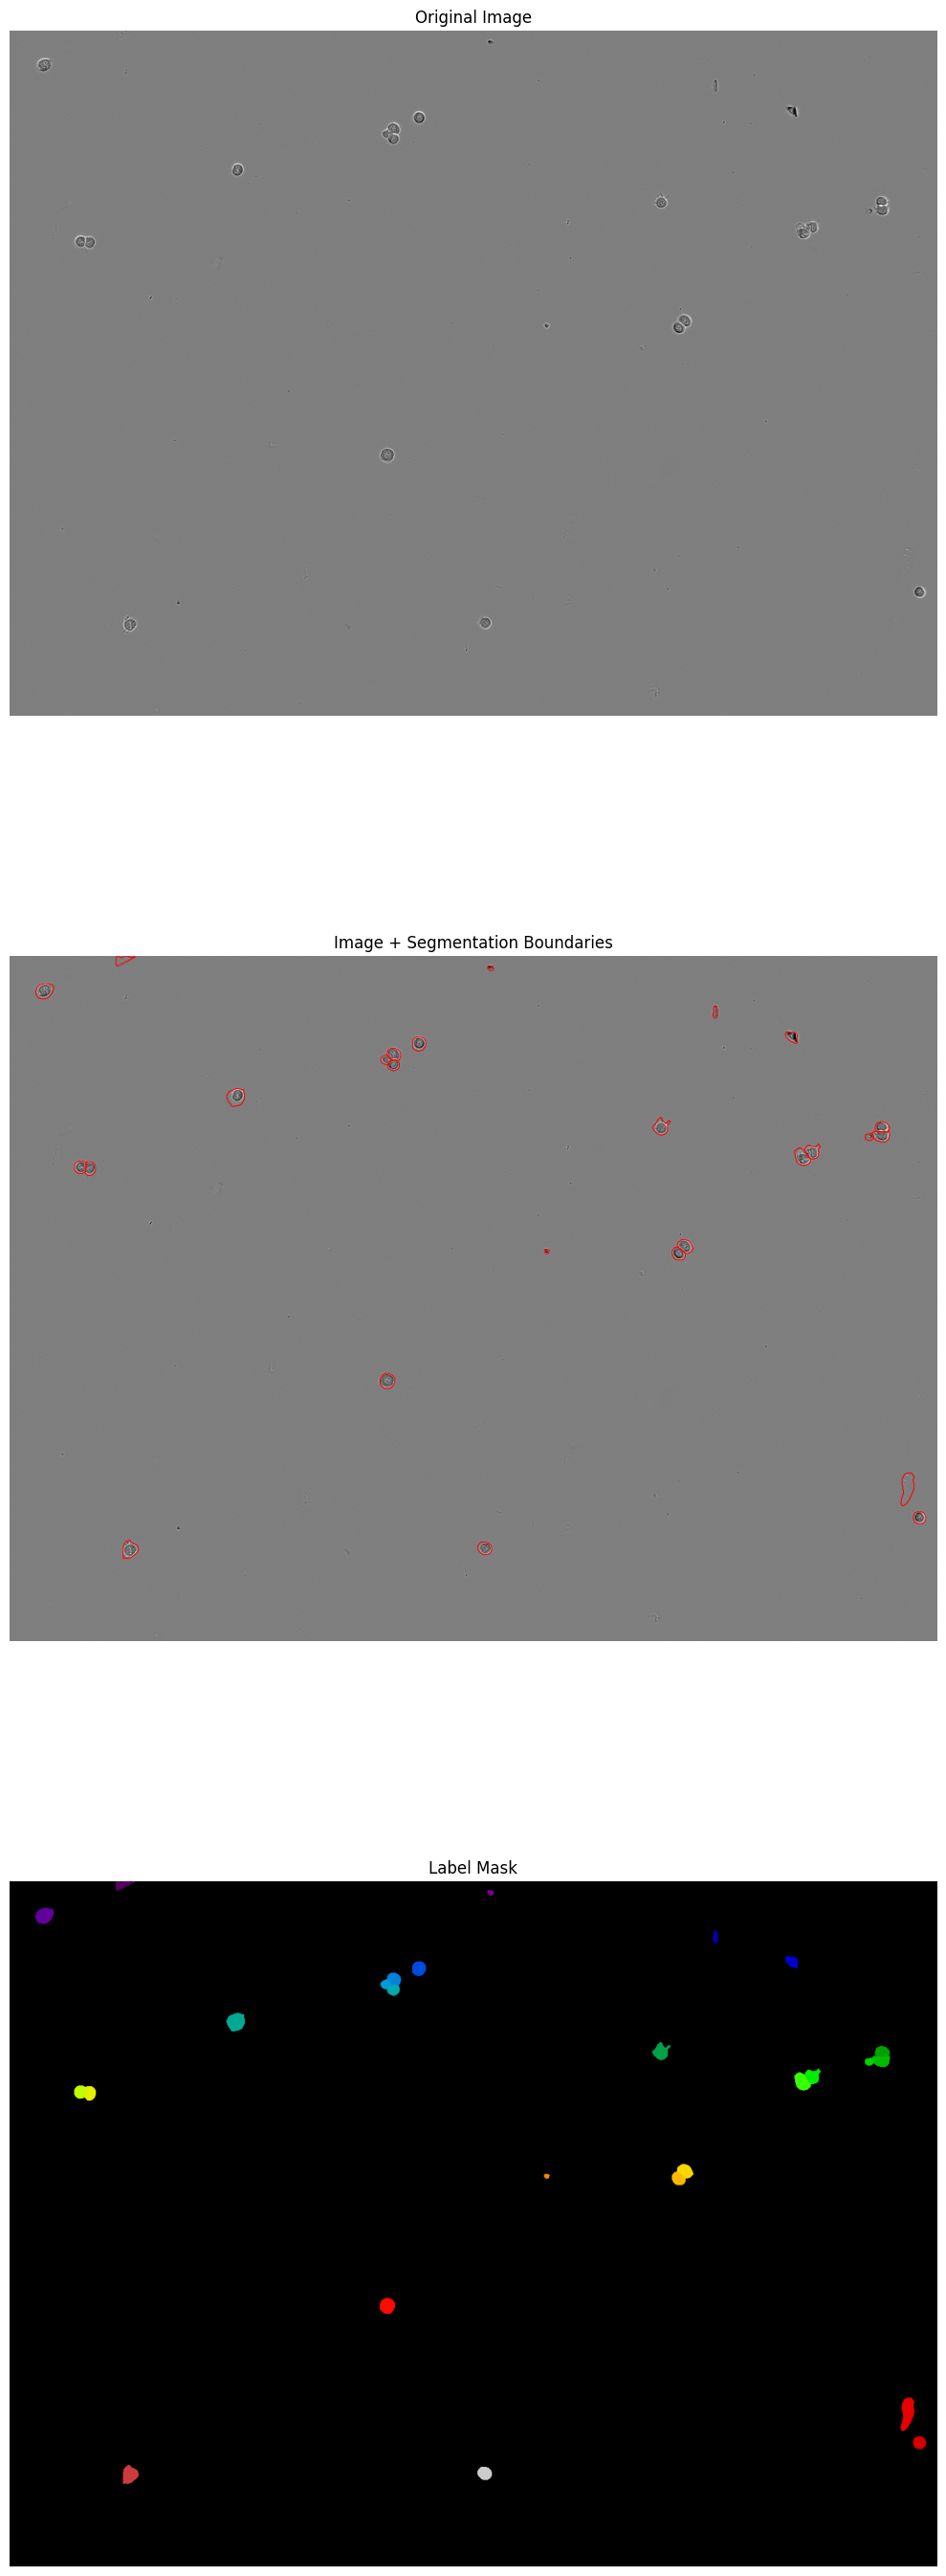

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from cellpose import utils

# Compute outlines
outlines = utils.outlines_list(masks)

fig, axes = plt.subplots(3, 1, figsize=(10, 30))

# Panel 1: Original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Panel 2: Image with outlines
axes[1].imshow(img, cmap='gray')
for outline in outlines:
    axes[1].plot(outline[:, 0], outline[:, 1], color='red', linewidth=0.7)
axes[1].set_title("Image + Segmentation Boundaries")
axes[1].axis('off')

# Panel 3: Label mask
axes[2].imshow(masks, cmap=cm.nipy_spectral)
axes[2].set_title("Label Mask")
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#@title Well Timestamp Segmentation (across sections)
import polars as pl
import pandas as pd
import numpy as np
import shutil
from pathlib import Path
import skimage.io
import skimage.measure
from cellpose import models

# Step 1: Load the metadata
meta = pl.read_parquet("/content/drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas Incucyte 2025/incucyte_images_metadata.parquet")

# Step 2: Filter for well A1 and timestamp 00d00h00m
subset = meta.filter(
    (pl.col("well") == "A1") &
    (pl.col("timestamp") == "00d00h00m")
)

# Step 3: Load Cellpose model with GPU
model = models.CellposeModel(gpu=True)

# Step 4: Prepare output list
records = []

# Step 5: Loop through the 121 sections
for row in subset.iter_rows(named=True):
    original_path = row["path"]
    filename = Path(original_path).name
    temp_path = f"/tmp/{filename}"

    try:
        # Copy to temporary path
        shutil.copy(original_path, temp_path)

        # Read and segment
        img = skimage.io.imread(temp_path)
        # Preprocessing here <----
        masks, _, _ = model.eval(img, diameter=None)

        # Extract features
        props = skimage.measure.regionprops(masks, intensity_image=img)
        for i, prop in enumerate(props):
            records.append({
                'filename': filename,
                'section': row["section"],
                'cell_id': i,
                'centroid_x': prop.centroid[1],
                'centroid_y': prop.centroid[0],
                'area': prop.area,
                'eccentricity': prop.eccentricity,
                'circularity': 4 * np.pi * prop.area / (prop.perimeter**2 + 1e-5),
                'mean_intensity': prop.mean_intensity,
                'bbox_xmin': prop.bbox[1],
                'bbox_xmax': prop.bbox[3],
                'bbox_ymin': prop.bbox[0],
                'bbox_ymax': prop.bbox[2],
            })

    except Exception as e:
        print(f"Error processing {filename}: {e}")

    finally:
        # Clean up: remove temporary file
        try:
            Path(temp_path).unlink()
        except FileNotFoundError:
            pass

# Step 6: Build final dataframe
df_cells = pd.DataFrame(records)

# Saving locally
df_cells.to_parquet("/content/df_cells_A1_00d00h00m.parquet")


In [ ]:
!ls

df_cells_A1_00d00h00m.parquet  drive  sample_data


In [ ]:
# !cp ./df_cells_A1_00d00h00m.parquet drive/Shareddrives/Tumoresferas/Experimentos/T007-Esferas\ Incucyte\ 2025/

In [ ]:
df_cells.head()

,filename,section,cell_id,centroid_x,centroid_y,area,eccentricity,circularity,mean_intensity,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax
0,VID1849_A1_121_00d00h00m.jpg,121,0,396.445122,3.823171,164.0,0.856851,0.819687,123.737805,387,407,0,10
1,VID1849_A1_121_00d00h00m.jpg,121,1,412.690217,33.945652,184.0,0.804915,0.859398,126.163043,404,423,28,43
2,VID1849_A1_121_00d00h00m.jpg,121,2,418.177419,45.490323,310.0,0.614324,0.880191,122.661290,408,428,34,56
3,VID1849_A1_121_00d00h00m.jpg,121,3,572.062657,58.563910,399.0,0.275563,0.984759,125.132832,561,584,48,70
4,VID1849_A1_121_00d00h00m.jpg,121,4,1046.612137,85.844327,379.0,0.408598,0.973607,123.422164,1036,1058,75,97


In [ ]:
df_cells.shape

(6183, 13)